<a href="https://colab.research.google.com/github/ghraji/ee932-reinforcement-learning/blob/main/epsilon_greedy_26april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]

In [5]:
## E1: ETC Demo Code ##

# Monte Carlo simulations
total_regrets = []

for _ in range(num_experiments):
    # Generate true means based on given values and arms
    mu0 = 1/2
    mu1 = 1/2 + delta

    # Initialize ETC algorithm parameters
    m = int(T**(2/3) * (np.log(T))**(1/3))
    empirical_means = np.zeros(K)
    arm_counts = np.zeros(K)
    total_regret = 0

    # Run ETC algorithm
    for t in range(1, T + 1):
        # Code for choosing the arm here for the ETC algorithm
        # Explore each arm m times then -> Commit to the arm with the highest empirical mean
        # store the chosen arm in the variable chosen_arm
        # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen
        if t <= K * m:
            chosen_arm = (t - 1) % K
        else:
            chosen_arm = np.argmax(empirical_means)

        # Observe the reward from the environment for the chosen arm
        reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

        # Update arm_counts and empirical_means for the chosen_arm
        arm_counts[chosen_arm] += 1
        empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

        # Update total regret based on reward recieved
        # update the variable total_regret
        total_regret += mu1  - reward

    # Record total regrets over all the experiments
    total_regrets.append(total_regret)

# Calculate average regret
average_regret = np.mean(total_regrets)

print(f"Average Regret: {average_regret}")

Average Regret: 243.374


In [6]:
## E2: ETC regret plot for different delta ##

# Initialize lists to store results
average_regrets_etc = []

for delta in delta_values:
    total_regrets = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Initialize ETC algorithm parameters
        m = int(T**(2/3) * (np.log(T))**(1/3))
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret = 0

        # Run ETC algorithm
        for t in range(1, T + 1):
            # Code for choosing the arm for the ETC algorithm
            # Explore each arm m times then -> Commit to the arm with the highest empirical mean
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen
            if t <= K * m:
                chosen_arm = (t - 1) % K
            else:
                # Commit to the arm with the highest empirical mean
                chosen_arm = np.argmax(empirical_means)

            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # update the variable total_regret
            total_regret += mu1 - reward

        # Record total regret for this experiment
        total_regrets.append(total_regret)

    # Calculate average regret for this delta
    average_regret = np.mean(total_regrets)
    average_regrets_etc.append(average_regret)

# print average regrets
print(average_regrets_etc)

[51.59399999998676, 94.58799999996258, 192.9799999999071, 293.93800000010214, 388.11999999980696, 437.42999999989405]


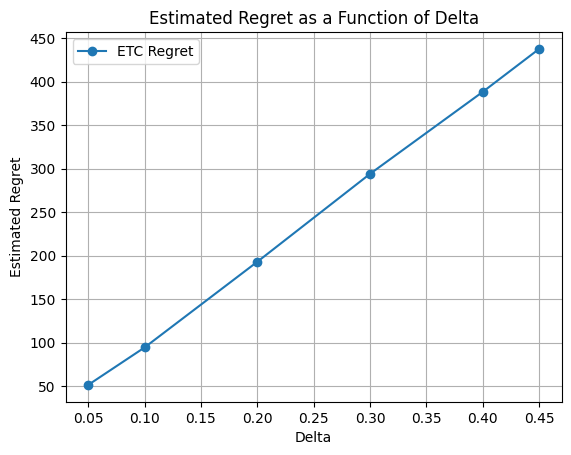

In [7]:
# Plotting
plt.plot(delta_values, average_regrets_etc, marker='o',label = 'ETC Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]


In [8]:
## Solution for Q1 ##

# Initialize lists to store results
average_regrets_ucb = []
ucb_values = []
counts = 0
bonus = 0


# UCB constant
c_ucb = np.sqrt(3/2)

for delta in delta_values:
    total_regrets_ucb = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Initialize UCB algorithm parameters
        empirical_means = np.zeros(K)
        arm_counts = np.ones(K)  # Explore each arm once
        total_regret_ucb = 0

        # Run UCB algorithm after exploring each arm once
        for t in range(K + 1, T + 1):
            # Calculate UCB for each arm
            # write your code here
            # [Hint] create and update a ucb_values numpy array same as the size of emperical_means
            # ucb_values = ?
            bonus = (np.sqrt((2 * np.log(T)) / (arm_counts)))

            ucb_values = empirical_means + bonus

            # Choose the arm with the highest UCB calculated above
            # write your code here
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
            # chosen_arm = ?
            chosen_arm = np.argmax(ucb_values)
            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            # arm_counts[chosen_arm] = ?
            # empirical_means[chosen_arm] = ?
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # write your code here
            # update the variable total_regret_ucb
            # total_regret_ucb = ?
            total_regret_ucb += mu1 - reward

        # Record total regret for this experiment
        total_regrets_ucb.append(total_regret_ucb)

    # Calculate average regret for this delta
    average_regret_ucb = np.mean(total_regrets_ucb)
    average_regrets_ucb.append(average_regret_ucb)

# print result
print(average_regrets_ucb)

[95.28199999999464, 90.24999999998064, 62.742000000012624, 46.70399999998731, 35.955999999996045, 33.040000000007055]


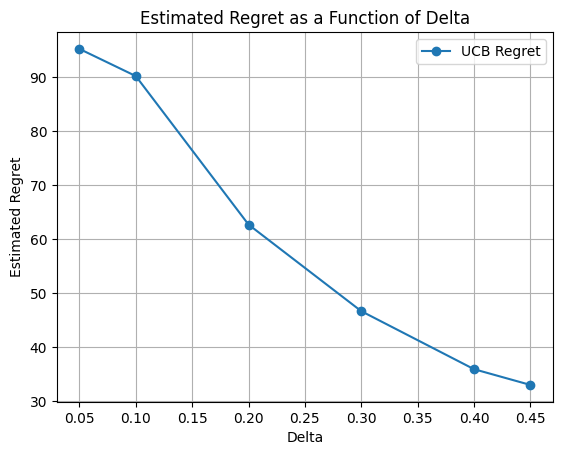

In [11]:
# Plotting
plt.plot(delta_values, average_regrets_ucb, marker='o',label = 'UCB Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]

In [14]:
## Solution for Q2 Problem ##

# Write here your modification to the code that includes this consideration for the ETC algorithm:

# Initialize lists to store results
average_regrets_egreedy = []

for delta in delta_values:
    total_regrets_egreedy = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Define the epsilon parameter
        e = 0.1

        # Initialize ETC algorithm parameters with optimized m
        empirical_means = np.zeros(K)
        arm_counts = np.zeros(K)
        total_regret_egreedy = 0

        # Run ETC algorithm with optimized m
        for t in range(1, T + 1):
            # Explore each arm m times then -> Commit to the arm with the highest empirical mean
            # write code here for choosing the arm here for the $\epsilon$-greedy algorithm
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 0 is chosen and 1 if Arm 1 is chosen

            # Observe the reward
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            # arm_counts[chosen_arm] = ?
            # empirical_means[chosen_arm] = ?

            # Update total regret
            # write your code here
            # update the variable total_regret_egreedy
            # total_regret_egreedy = ?

        # Record total regret for this experiment
        total_regrets_egreedy.append(total_regret_egreedy)

    # Calculate average regret for this delta
    average_regret_egreedy = np.mean(total_regrets_egreedy)
    average_regrets_egreedy.append(average_regret_egreedy)

# print result
print(average_regrets_egreedy)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


# New Section

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  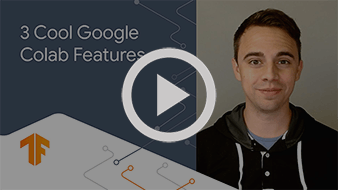
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

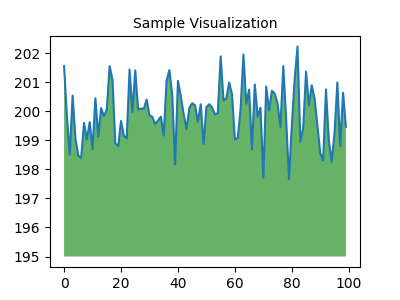

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
